# MLADHD Experiment notebook with WANDB

Notebook created by [Gonzalo Córdova](https://github.com/gonzalo-cordova-pou) in January 2023.

For any doubts: gonzalo.cordova@estudiantat.upc.edu

## Preparing WANDB

In [1]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 KB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 11.6 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=0d09a0823570a4fd665e147b450326bf2611c0a7880150c19664bf82de10a221
  Stored in directory: /root/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built pathtools
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [2]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [3]:
import wandb

## Setting up our Colab enviroment

We import Python packages:

In [5]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import random
import torch
import numpy as np
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import sampler, DataLoader
from torchvision.models import resnet50, ResNet50_Weights
import matplotlib.pyplot as plt

We mount our shared folder in Google Drive.

IMPORTANT: You must have a direct access to the 2023-ADHD-VCU-UPC folder in your main Google Drive root.

In [6]:
from google.colab import drive
# Make sure to include a direct access from your Drive to the project shared folder
drive.mount('/content/drive')

Mounted at /content/drive


We clone [our GitHub repo](https://github.com/JulianaGSouza/MLADHD) to the Colab enviroment. Make sure that you have access to the repository.

If you don't know how to generate a github token check this link: https://docs.github.com/en/enterprise-server@3.4/authentication/keeping-your-account-and-data-secure/creating-a-personal-access-token



In [7]:
username = 'JulianaGSouza'
repository = 'MLADHD'
token = ''

In [8]:
!git clone https://{token}@github.com/{username}/{repository}

Cloning into 'MLADHD'...
remote: Enumerating objects: 3565, done.
remote: Counting objects: 100% (549/549), done.
remote: Compressing objects: 100% (526/526), done.
remote: Total 3565 (delta 32), reused 530 (delta 22), pack-reused 3016
Receiving objects: 100% (3565/3565), 703.25 MiB | 19.91 MiB/s, done.
Resolving deltas: 100% (47/47), done.


Finally import our MLADHD module.

In [9]:
from MLADHD.mlmodeling import *

## Experiments

- [**Case 1:** Crating a new model.](#s1)
- [**Case 2:** Using our pretrained models [IN PROGRESS..]](#s2)

<a name='s1'></a>
### Experiment - Case 1: Creating a new model

The idea of case 1 is to create a model by using a pretrained PyTorch model and adding a classification layer. We will train the model freezing the pretrained model (resnet50, in this case).

- Choose a name for the model
- Indicate where the data is stored
- Choose where to save the model
- Choose a validation size

**IMPORTANT** Make sure that the model_dir exists, create the folder if necessary

In [10]:
model_name = 'testwandb'
data_dir = './drive/MyDrive/2023-ADHD-VCU-UPC/data/'
models_dir = './drive/MyDrive/2023-ADHD-VCU-UPC/models/'
valid_size = 0.2

Create a dictionary with the hyperparameters:

In [11]:
hyperparams = {
    'lr': 0.003, 
    'epochs': 1, 
    'batch_size': 64,
    'optimizer': 'Adam',            # options: Adam, SGD
    'loss': 'NLLLoss',              # options: NLLLoss, CrossEntropyLoss
    'pretrained_model': 'resnet50', # options: resnet50, vgg16
    'freeze_pretrained_model': True,# options: True, False
    'train_transforms': 'default',  # options: default
    'test_transforms': 'default'    # options: default
}

Create a new experiment with the MLADHD Python class.

In [12]:
experiment = MLADHD(model_name, data_dir, models_dir, hyperparams, wandb=True)

-------------- **Start a new wandb run to track this script** --------------

In [13]:
configuration = hyperparams
configuration["name"] = experiment.name
configuration["date"] = experiment.date

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="MLADHD",
    # track hyperparameters and run metadata
    config=hyperparams
)

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: gonzaloc. Use `wandb login --relogin` to force relogin


Load and split the data into train and test.

In [14]:
experiment.load_split_dataset(valid_size)

Train size:  24
Test size:  6
Trainloader and Testloader created. Access them with self.train and self.test


Create a new model using the pretrained model indicated in the hyperparameters

In [15]:
experiment.create_model()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Check what pretrained model has been used.

In [16]:
experiment.hyperparams["pretrained_model"]

'resnet50'

Now lets train our model with the train data:

In [17]:
experiment.train_model()

Epoch: 1/1..  Training Loss: 1.289.. 
Training finished!
Model saved as:  testwandb_resnet50_2023-01-07_18-18-41.pth


Check that the new trained model and the hyperparameters used have been stored in the indicated folder with the name *modelname_pretrainedmodel_date_time.pth* and *modelname_pretrainedmodel_date_time.json* respectively.

Now lets test our model with the test data and see the test_loss and accuracy.

In [18]:
print("Testing model...")
test_loss,accuracy = experiment.test_model()
wandb.log({"test_acc": accuracy, "test_loss": test_loss})
print(test_loss,accuracy)

Testing model...
0.053931434328357376 0.9751157363255819


Plot the training loss during the last epoch.

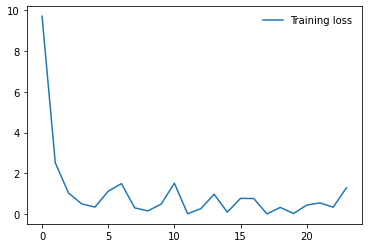

In [19]:
plt.plot(experiment.running_loss[-1],label='Training loss')
plt.legend(frameon=False)
plt.show()

In [20]:
wandb.finish()

test_acc,▁
test_loss,▁
train_loss,▁
test_acc,0.97512
test_loss,0.05393
train_loss,1.2886


<a name='s2'></a>
### Experiment - Case 2: Using our pretrained models [IN PROGRESS..]

If we have already trained a model we can load it to our enviroment in order to test it or to predict images.

We will load:
- The trained model
- The hyperparameters used for its training

In [ ]:
data_dir = './drive/MyDrive/2023-ADHD-VCU-UPC/data/'
models_dir = './drive/MyDrive/2023-ADHD-VCU-UPC/models/'
pretrained_model = 'test_resnet50_2023-01-07_16-30-08'
model_name = pretrained_model.split('_')[0]
print("Loading hyperparams...")
with open(models_dir+pretrained_model+'.json', 'r') as fp:
    hyperparams = json.load(fp)
# when loading a pretrained model, the date is updated to the current date
# so that the model is not overwritten (see __init__)
experiment2 = MLADHD(model_name, data_dir, models_dir, hyperparams)

Loading hyperparams...


In [ ]:
experiment2.hyperparams

{'lr': 0.003,
 'epochs': 1,
 'batch_size': 64,
 'optimizer': 'Adam',
 'loss': 'NLLLoss',
 'pretrained_model': 'resnet50',
 'freeze_pretrained_model': True,
 'train_transforms': 'default',
 'test_transforms': 'default'}